Возьмем набор данных Cars93 - характеристики автомобилей.
Опишем колонки, характеристики.
Проведем анализ EDA, предварительную обработку данных, если это необходимо
Решим задачу сегментации при помощи не менее 5-ти подходов ML. Составим ансамбль моделей.
Решим задачу поиска аномалий.
Добавим Визуализацию. Создадим графики ошибок прогнозирования, метрик качества обученной модели и важности признаков.


СЕГМЕНТАЦИЯ АВТОМОБИЛЕЙ С ОБНАРУЖЕНИЕМ АНОМАЛИЙ

Загружен датасет Характеристики 93х автомобилей 1993 года
------------------------------------------------
Разведывательный анализ - EDA:

Основная информация о данных:
Размер датасета: 93 строк, 27 колонок
Типы данных:
Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight     

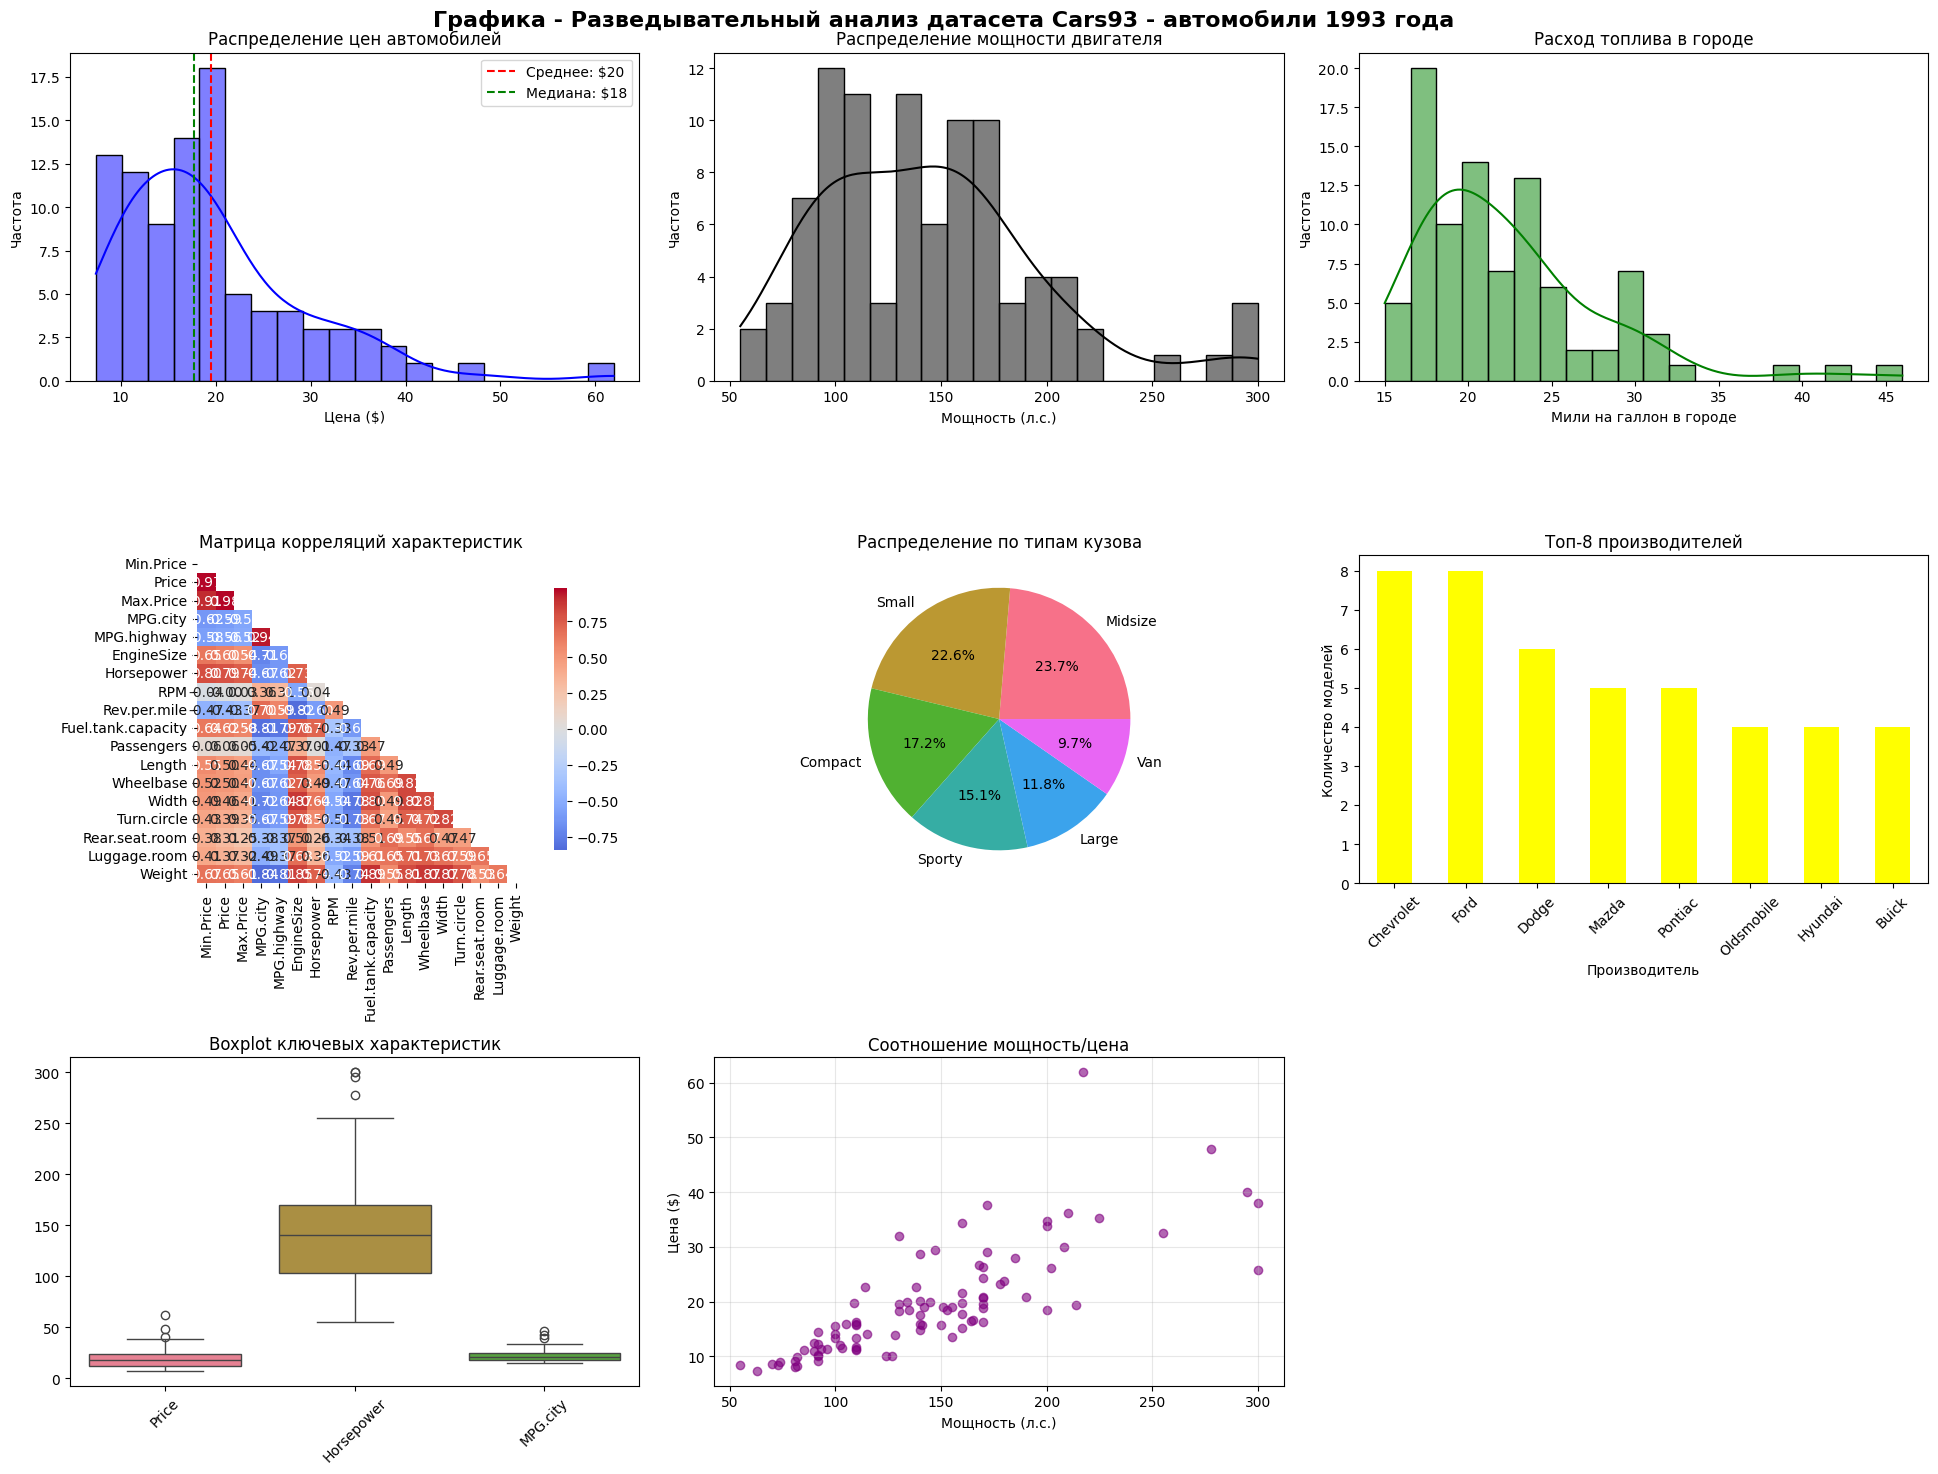

------------------------------------------------
ОБНАРУЖЕНИЕ АНОМАЛИЙ:
Подготовка данных для обнаружения аномалий
Кодируем категориальные признаки:
  Manufacturer: закодировано 32 уникальных значений
  Model: закодировано 93 уникальных значений
  Type: закодировано 6 уникальных значений
  AirBags: закодировано 3 уникальных значений
  DriveTrain: закодировано 3 уникальных значений
  Cylinders: закодировано 6 уникальных значений
  Man.trans.avail: закодировано 2 уникальных значений
  Origin: закодировано 2 уникальных значений
  Make: закодировано 93 уникальных значений
Ключевые признаки для анализа аномалий: ['Price', 'Horsepower', 'MPG.city', 'EngineSize', 'RPM', 'Rev.per.mile']
Анализируем 93 автомобилей с 6 признаками

1. Isolation Forest
2. Local Outlier Factor
3. Межквартильный размах (IQR)
4. Z-Score метод

Визуализация обнаруженных аномалий


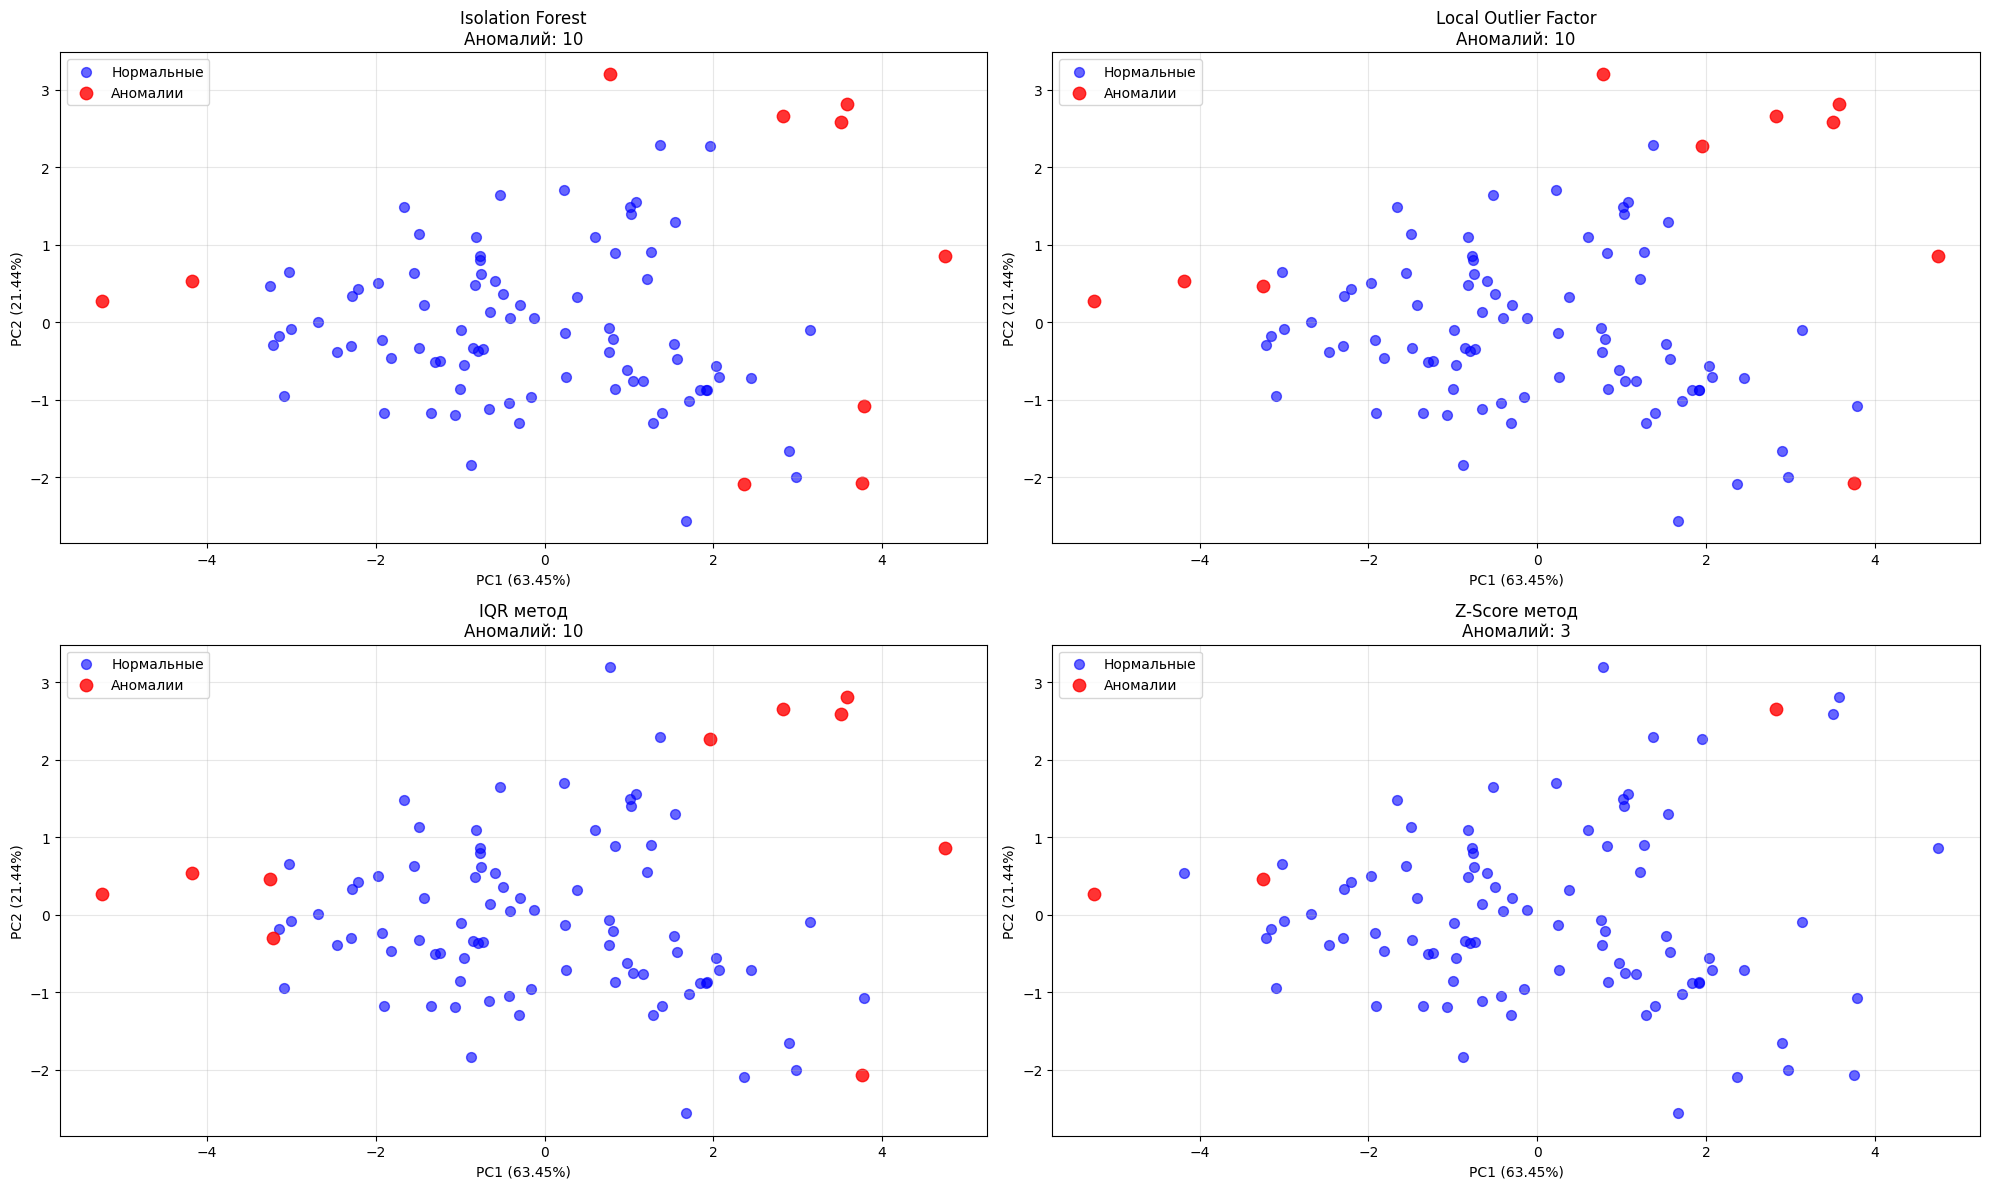


Анализ согласованности методов обнаружения аномалий


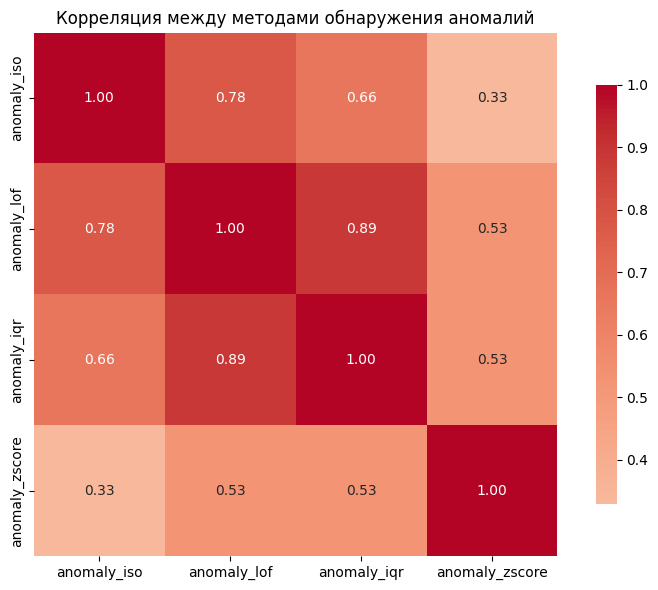


Консенсус методов обнаружения аномалий:
  0 методов обнаружили аномалию: 80 автомобилей (86.0%)
  1 методов обнаружили аномалию: 3 автомобилей (3.2%)
  2 методов обнаружили аномалию: 2 автомобилей (2.2%)
  3 методов обнаружили аномалию: 6 автомобилей (6.5%)
  4 методов обнаружили аномалию: 2 автомобилей (2.2%)

Финальные аномалии (обнаружены >=2 методами): 10 автомобилей


-------------------------------------------------------
ПОДРОБНЫЙ АНАЛИЗ АНОМАЛЬНЫХ АВТОМОБИЛЕЙ:

Аномальный автомобиль [Индекс 7]:
  Основная информация: Manufacturer: 3, Model: 73, Type: 1
  Обнаружен методами: iso, lof, iqr
  Аномальные характеристики:
    - EngineSize: 5.7 (ВЫШЕ среднего 2.7 на 2.9σ)
    - RPM: 4000.0 (НИЖЕ среднего 5280.6 на 2.1σ)
    - Rev.per.mile: 1320.0 (НИЖЕ среднего 2332.2 на 2.0σ)
  Анализ выбросов (IQR):
    - Price: 23.7 в пределах нормы
    - Horsepower: 180.0 в пределах нормы
    - MPG.city: 16.0 в пределах нормы
    - EngineSize: 5.7 ВЫШЕ верхней границы (5.5)

Аномальный автомобиль

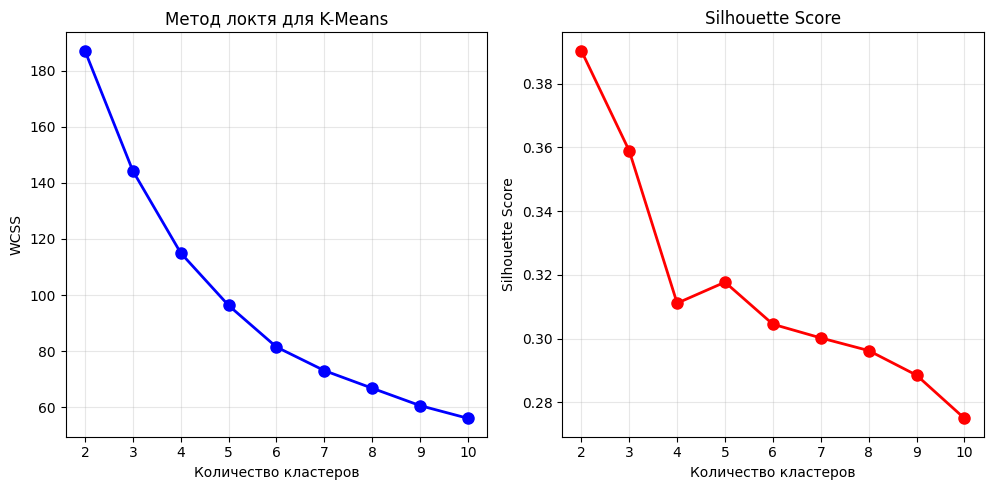

Рекомендуемое число кластеров: 2

Выполняем кластеризацию на 2 кластеров
1. K-Means кластеризация
2. DBSCAN кластеризация
3. GMM кластеризация
4. Agglomerative кластеризация
5. Spectral кластеризация

Оценка качества кластеризации:

K-Means:
  Кластеров: 2
  Silhouette: 0.3903
  Calinski-Harabasz: 70.7979
  Davies-Bouldin: 0.9914

DBSCAN:
  Кластеров: 0
  Silhouette: 0.0000
  Calinski-Harabasz: 0.0000
  Davies-Bouldin: 0.0000

GMM:
  Кластеров: 2
  Silhouette: 0.3227
  Calinski-Harabasz: 52.8731
  Davies-Bouldin: 1.1471

Agglomerative:
  Кластеров: 2
  Silhouette: 0.3551
  Calinski-Harabasz: 47.1746
  Davies-Bouldin: 0.8701

Spectral:
  Кластеров: 2
  Silhouette: 0.3870
  Calinski-Harabasz: 68.4950
  Davies-Bouldin: 0.9884

Визуализация результатов кластеризации


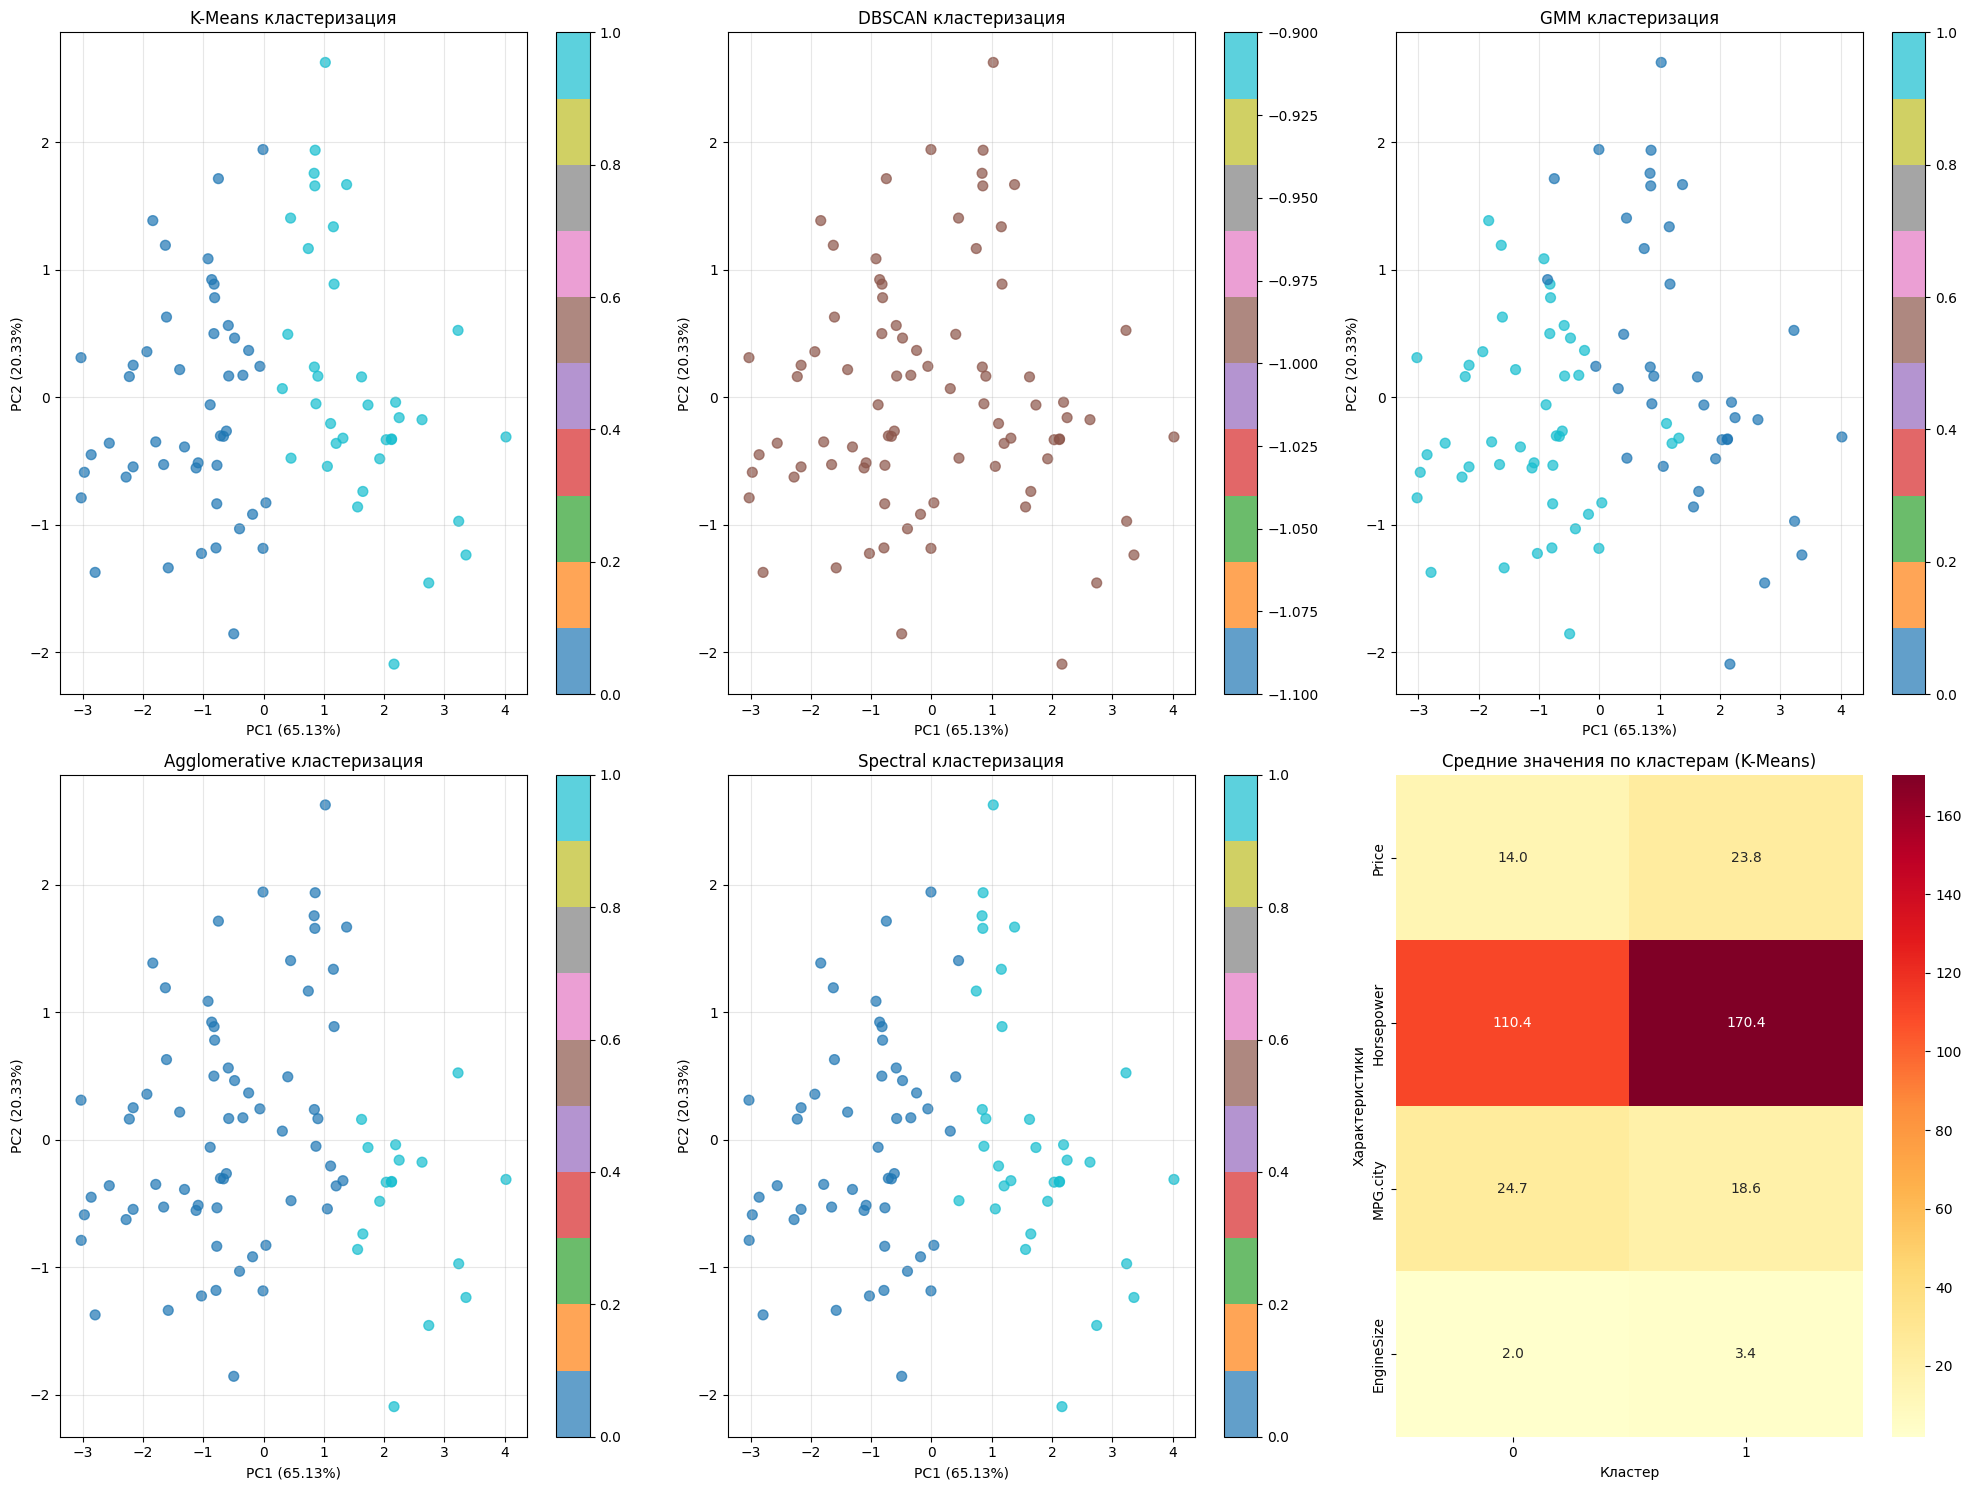

Интерпретация - описание 2 кластеров автомобилей:

Кластер 0:
  Размер: 47 автомобилей (56.6%)
  Тип: бюджетные автомобили
  Средняя цена: $14
  Мощность: 110 л.с. (ниже среднего)
  Расход: 24.7 миль/галлон (экономичнее)
  Производители: 10 (5), 8 (4)
  Типы кузова: 3 (18), 0 (13)
  Ключевые характеристики:
    - Horsepower: ниже среднего на 0.67
    - MPG.city: выше среднего на 0.63
    - Price: ниже среднего на 0.56
------------------------------------------------
Кластер 1:
  Размер: 36 автомобилей (43.4%)
  Тип: премиум автомобили
  Средняя цена: $24
  Мощность: 170 л.с. (выше среднего)
  Расход: 18.6 миль/галлон (менее экономичные)
  Производители: 5 (4), 10 (3)
  Типы кузова: 2 (12), 1 (10)
  Ключевые характеристики:
    - Horsepower: выше среднего на 0.87
    - MPG.city: ниже среднего на 0.82
    - Price: выше среднего на 0.74
------------------------------------------------


Выполненны основные цени и этапы работы:
- Поработали с новым, ранее не используемым датасетом
- Провел

In [69]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')

#Настроим визуал
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['font.size'] = 10

print("СЕГМЕНТАЦИЯ АВТОМОБИЛЕЙ С ОБНАРУЖЕНИЕМ АНОМАЛИЙ")

#Загрузка данных
def load_car_sales_data():
    try:
        url = "https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv"
        data = pd.read_csv(url)
        print("\nЗагружен датасет Характеристики 93х автомобилей 1993 года")
        return data
    except Exception as e:
        print(f"Ошибка загрузки датасета: {e}")
        return None

#Начнем анализ данных EDA
def exploratory_data_analysis(data):
    print("------------------------------------------------")
    print("Разведывательный анализ - EDA:")

    print("\nОсновная информация о данных:")
    print(f"Размер датасета: {data.shape[0]} строк, {data.shape[1]} колонок")
    print(f"Типы данных:\n{data.dtypes}")

    print("\nПервые 5 строк данных:")
    print(data.head())

    print("\nСтатистика числовых колонок:")
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    print(data[numerical_cols].describe())

    print("\nПроверка пропущенных значений:")
    missing_data = data.isnull().sum()
    print(missing_data[missing_data > 0])

    fig = plt.figure(figsize=(20, 15))
    fig.suptitle(
        'Графика - Разведывательный анализ датасета Cars93 - автомобили 1993 года',
        fontsize=16,
        fontweight='bold'
            )

    numerical_columns = data.select_dtypes(include=[np.number]).columns

    plt.subplot(3, 3, 1)
    if 'Price' in data.columns:
        sns.histplot(data['Price'], kde=True, bins=20, color='blue')
        plt.title('Распределение цен автомобилей')
        plt.xlabel('Цена ($)')
        plt.ylabel('Частота')
        plt.axvline(
            data['Price'].mean(),
            color='red',#1111
            linestyle='--',
            label=f'Среднее: ${data["Price"].mean():.0f}'
        )
        plt.axvline(
            data['Price'].median(),
            color='green',
            linestyle='--',
            label=f'Медиана: ${data["Price"].median():.0f}'
        )
        plt.legend()

    plt.subplot(3, 3, 2)
    if 'Horsepower' in data.columns:
        sns.histplot(data['Horsepower'], kde=True, bins=20, color='black')
        plt.title('Распределение мощности двигателя')
        plt.xlabel('Мощность (л.с.)')
        plt.ylabel('Частота')
        plt.color='green',
    plt.subplot(3, 3, 3)
    if 'MPG.city' in data.columns:
        sns.histplot(data['MPG.city'], kde=True, bins=20,color='green')
        plt.title('Расход топлива в городе')
        plt.xlabel('Мили на галлон в городе')
        plt.ylabel('Частота')

    plt.subplot(3, 3, 4)
    if len(numerical_columns) > 1:
        correlation_matrix = data[numerical_columns].corr()
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(
            correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8}
        )
        plt.title('Матрица корреляций характеристик')

        strong_correlations = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i + 1, len(correlation_matrix.columns)):
              if abs(correlation_matrix.iloc[i, j]) > 0.6:
                    strong_correlations.append((
                        correlation_matrix.columns[i],
                        correlation_matrix.columns[j],
                        correlation_matrix.iloc[i, j]
                    ))

        print("\nСильные корреляции (> |0.6|):")
        for corr in strong_correlations:
            print(f"  {corr[0]} <-> {corr[1]}: {corr[2]:.3f}")
    else:
        plt.text(
            0.5,
            0.5,
            'Недостаточно числовых\nпризнаков для анализа',
            ha='center',
            va='center',
            transform=plt.gca().transAxes
        )
        plt.title('Корреляционный анализ')

    plt.subplot(3, 3, 5)
    if 'Type' in data.columns:
        type_counts = data['Type'].value_counts()
        plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
        plt.title('Распределение по типам кузова')

    plt.subplot(3, 3, 6)
    if 'Manufacturer' in data.columns:
        manufacturer_counts = data['Manufacturer'].value_counts().head(8)
        manufacturer_counts.plot(kind='bar',color='yellow')
        plt.title('Топ-8 производителей')
        plt.xlabel('Производитель')
        plt.ylabel('Количество моделей')
        plt.xticks(rotation=45)

    plt.subplot(3, 3, 7)
    if len(numerical_columns) >= 3:
        key_columns = []
        for col in ['Price', 'Horsepower', 'MPG.city']:
            if col in numerical_columns:
                key_columns.append(col)
        if len(key_columns) >= 2:
            boxplot_data = data[key_columns]
            sns.boxplot(data=boxplot_data)
            plt.title('Boxplot ключевых характеристик')
            plt.xticks(rotation=45)

    plt.subplot(3, 3, 8)
    if 'Price' in data.columns and 'Horsepower' in data.columns:
        plt.scatter(data['Horsepower'], data['Price'], alpha=0.6, color='purple')
        plt.title('Соотношение мощность/цена')
        plt.xlabel('Мощность (л.с.)')
        plt.ylabel('Цена ($)')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return numerical_columns

#Работа с аномалиями в данных
def detect_anomalies(data, numerical_columns):
    print("------------------------------------------------")
    print("ОБНАРУЖЕНИЕ АНОМАЛИЙ:")


    print("Подготовка данных для обнаружения аномалий")

    df_processed = data.copy()

    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    label_encoders = {}

    if len(categorical_columns) > 0:
        print("Кодируем категориальные признаки:")
        for col in categorical_columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            label_encoders[col] = le
            print(f"  {col}: закодировано {len(le.classes_)} уникальных значений")

    key_features = []
    for feature in ['Price', 'Horsepower', 'MPG.city', 'EngineSize', 'RPM', 'Rev.per.mile']:
        if feature in df_processed.columns:
            key_features.append(feature)

    if len(key_features) < 3:
        key_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()[:5]

    print(f"Ключевые признаки для анализа аномалий: {key_features}")

    scaler = StandardScaler()
    X = df_processed[key_features].values
    X_scaled = scaler.fit_transform(X)

    print(f"Анализируем {len(X_scaled)} автомобилей с {len(key_features)} признаками")

    print("\n1. Isolation Forest")
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomalies_iso = iso_forest.fit_predict(X_scaled)
    df_processed['anomaly_iso'] = anomalies_iso

    print("2. Local Outlier Factor")
    lof = LocalOutlierFactor(contamination=0.1)
    anomalies_lof = lof.fit_predict(X_scaled)
    df_processed['anomaly_lof'] = anomalies_lof

    print("3. Межквартильный размах (IQR)")

    def detect_iqr_anomalies(dataframe, numerical_columns, threshold=1.5):
        anomalies = pd.Series(False, index=dataframe.index)
        for col in numerical_columns:
            q1 = dataframe[col].quantile(0.25)
            q3 = dataframe[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            col_anomalies = (
                (dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)
            )
            anomalies = anomalies | col_anomalies
        return anomalies

    anomalies_iqr = detect_iqr_anomalies(df_processed, key_features)
    df_processed['anomaly_iqr'] = anomalies_iqr.astype(int)

    print("4. Z-Score метод")

    def detect_zscore_anomalies(dataframe, numerical_columns, threshold=3):
        anomalies = pd.Series(False, index=dataframe.index)
        for col in numerical_columns:
            z_scores = np.abs(
                (dataframe[col] - dataframe[col].mean()) / dataframe[col].std()
            )
            col_anomalies = z_scores > threshold
            anomalies = anomalies | col_anomalies
        return anomalies

    anomalies_zscore = detect_zscore_anomalies(df_processed, key_features)
    df_processed['anomaly_zscore'] = anomalies_zscore.astype(int)

    visualize_anomaly_detection(df_processed, X_scaled, key_features)

    analyze_anomaly_consistency(df_processed)

    print("\nРезультаты обнаружения аномалий:")
    print(f"Isolation Forest: {(df_processed['anomaly_iso'] == -1).sum()} аномалий")
    print(f"Local Outlier Factor: {(df_processed['anomaly_lof'] == -1).sum()} аномалий")
    print(f"IQR метод: {df_processed['anomaly_iqr'].sum()} аномалий")
    print(f"Z-Score метод: {df_processed['anomaly_zscore'].sum()} аномалий")

    return df_processed, X_scaled, key_features, scaler, label_encoders

#Визуализация результатов обнаружения аномалий
def visualize_anomaly_detection(df_processed, X_scaled, feature_names):
    print("\nВизуализация обнаруженных аномалий")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    methods = [
        ('Isolation Forest', 'anomaly_iso'),
        ('Local Outlier Factor', 'anomaly_lof'),
        ('IQR метод', 'anomaly_iqr'),
        ('Z-Score метод', 'anomaly_zscore')
    ]

    plt.figure(figsize=(20, 12))

    for i, (name, col) in enumerate(methods):
        plt.subplot(2, 2, i + 1)

        if col in ['anomaly_iso', 'anomaly_lof']:
            normal_mask = df_processed[col] == 1
            anomaly_mask = df_processed[col] == -1
        else:
            normal_mask = df_processed[col] == 0
            anomaly_mask = df_processed[col] == 1

        plt.scatter(
            X_pca[normal_mask, 0],
            X_pca[normal_mask, 1],
            c='blue',
            alpha=0.6,
            s=50,
            label='Нормальные'
        )
        if anomaly_mask.sum() > 0:
            plt.scatter(
                X_pca[anomaly_mask, 0],
                X_pca[anomaly_mask, 1],
                c='red',
                alpha=0.8,
                s=80,
                label='Аномалии'
            )

        plt.title(f'{name}\nАномалий: {anomaly_mask.sum()}')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

#Анализ согласованности методов обнаружения аномалий
def analyze_anomaly_consistency(df_processed):

    print("\nАнализ согласованности методов обнаружения аномалий")

    anomaly_columns = ['anomaly_iso', 'anomaly_lof', 'anomaly_iqr', 'anomaly_zscore']

    binary_anomalies = pd.DataFrame()
    for col in anomaly_columns:
        if col in ['anomaly_iso', 'anomaly_lof']:
            binary_anomalies[col] = (df_processed[col] == -1).astype(int)
        else:
            binary_anomalies[col] = df_processed[col]

    plt.figure(figsize=(8, 6))
    correlation_matrix = binary_anomalies.corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        square=True,
        fmt='.2f',
        cbar_kws={'shrink': 0.8}
    )
    plt.title('Корреляция между методами обнаружения аномалий')
    plt.tight_layout()
    plt.show()

    binary_anomalies['consensus'] = binary_anomalies.sum(axis=1)

    print("\nКонсенсус методов обнаружения аномалий:")
    consensus_counts = binary_anomalies['consensus'].value_counts().sort_index()
    for count, freq in consensus_counts.items():
        percentage = freq / len(df_processed) * 100
        print(f"  {count} методов обнаружили аномалию: {freq} автомобилей ({percentage:.1f}%)")

    df_processed['final_anomaly'] = (binary_anomalies['consensus'] >= 2).astype(int)

    final_anomalies_count = df_processed['final_anomaly'].sum()
    print(f"\nФинальные аномалии (обнаружены >=2 методами): {final_anomalies_count} автомобилей")
#Покажем более делатально аномалии
    if final_anomalies_count > 0:
        print("\n")
        print("-------------------------------------------------------")
        print("ПОДРОБНЫЙ АНАЛИЗ АНОМАЛЬНЫХ АВТОМОБИЛЕЙ:")


        anomaly_indices = df_processed[df_processed['final_anomaly'] == 1].index

        key_numeric_features = [
            'Price', 'Horsepower', 'MPG.city', 'EngineSize',
            'MPG.highway', 'RPM', 'Rev.per.mile'
        ]
        available_numeric_features = [
            f for f in key_numeric_features if f in df_processed.columns
        ]

        text_features = ['Manufacturer', 'Model', 'Type']
        available_text_features = [
            f for f in text_features if f in df_processed.columns
        ]

        z_scores_all = {}
        for feature in available_numeric_features:
            mean_val = df_processed[feature].mean()
            std_val = df_processed[feature].std()
            z_scores_all[feature] = (df_processed[feature] - mean_val) / std_val

        for idx in anomaly_indices:
            print(f"\nАномальный автомобиль [Индекс {idx}]:")

            if available_text_features:
                car_info = []
                for feature in available_text_features:
                    if feature in df_processed.columns:
                        car_info.append(f"{feature}: {df_processed.loc[idx, feature]}")
                print(f"  Основная информация: {', '.join(car_info)}")

            methods_detected = []
            for method in anomaly_columns:
                if binary_anomalies.loc[idx, method] == 1:
                    methods_detected.append(method.replace('anomaly_', ''))
            print(f"  Обнаружен методами: {', '.join(methods_detected)}")

            print(f"  Аномальные характеристики:")
            anomalous_features = []

            for feature in available_numeric_features:
                z_score = z_scores_all[feature].loc[idx]
                if abs(z_score) > 2:
                    direction = "ВЫШЕ" if z_score > 0 else "НИЖЕ"
                    value = df_processed.loc[idx, feature]
                    mean_val = df_processed[feature].mean()

                    if feature == 'Price':
                        value_str = f"${value:.0f}"
                        mean_str = f"${mean_val:.0f}"
                    elif feature in ['MPG.city', 'MPG.highway']:
                        value_str = f"{value:.1f} миль/галлон"
                        mean_str = f"{mean_val:.1f} миль/галлон"
                    elif feature == 'Horsepower':
                        value_str = f"{value:.0f} л.с."
                        mean_str = f"{mean_val:.0f} л.с."
                    else:
                        value_str = f"{value:.1f}"
                        mean_str = f"{mean_val:.1f}"

                    print(f"    - {feature}: {value_str} ({direction} среднего {mean_str} на {abs(z_score):.1f}σ)")
                    anomalous_features.append(feature)

            if not anomalous_features:
                print("    - Нет явно выраженных аномальных характеристик (комбинация факторов)")

            print(f"  Анализ выбросов (IQR):")
            for feature in available_numeric_features[:4]:
                q1 = df_processed[feature].quantile(0.25)
                q3 = df_processed[feature].quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                value = df_processed.loc[idx, feature]

                if value < lower_bound:
                    print(f"    - {feature}: {value:.1f} НИЖЕ нижней границы ({lower_bound:.1f})")
                elif value > upper_bound:
                    print(f"    - {feature}: {value:.1f} ВЫШЕ верхней границы ({upper_bound:.1f})")
                else:
                    print(f"    - {feature}: {value:.1f} в пределах нормы")

        #Статистика аномалий
        print("\nМетоды обнаружения аномалий:")
        for method in anomaly_columns:
            method_name = method.replace('anomaly_', '')
            count = binary_anomalies[method].sum()
            percentage = count / len(df_processed) * 100
            print(f"  {method_name}: {count} автомобилей ({percentage:.1f}%)")

        feature_anomaly_count = {}
        for idx in anomaly_indices:
            for feature in available_numeric_features:
                if abs(z_scores_all[feature].loc[idx]) > 2:
                    feature_anomaly_count[feature] = feature_anomaly_count.get(feature, 0) + 1

        if feature_anomaly_count:
            print(f"\nСамые частые аномальные признаки:")
            sorted_features = sorted(
                feature_anomaly_count.items(),
                key=lambda x: x[1],
                reverse=True
            )[:5]
            for feature, count in sorted_features:
                print(f"  {feature}: {count} автомобилей")

#Удаление аномалий и кластеризация
def remove_anomalies_and_cluster(df_processed, X_scaled, features_for_clustering):
    print("\n------------------------------------------------")
    print("КЛАСТЕРИЗАЦИЯ БЕЗ АНОМАЛИЙ:")


    normal_data_mask = df_processed['final_anomaly'] == 0
    df_clean = df_processed[normal_data_mask].copy()
    X_clean = X_scaled[normal_data_mask]

    print(f"Данные после удаления аномалий:")
    print(f"  Исходный размер: {len(df_processed)} автомобилей")
    print(f"  После очистки: {len(df_clean)} автомобилей")
    print(f"  Удалено аномалий: {len(df_processed) - len(df_clean)}")

    optimal_clusters = find_optimal_clusters(X_clean)

    df_with_clusters = perform_clustering(X_clean, optimal_clusters, features_for_clustering, df_clean)

    return df_with_clusters

#Поиск оптимального количества кластеров
def find_optimal_clusters(X_scaled):
    print("\nОпределяем оптимальное число кластеров")

    if len(X_scaled) < 10:
        print("Недостаточно данных для анализа кластеров")
        return 3

    wcss = []
    silhouette_scores = []
    k_range = range(2, min(11, len(X_scaled) // 2))

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

        if len(X_scaled) > k:
            silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
        else:
            silhouette_scores.append(0)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Количество кластеров')
    plt.ylabel('WCSS')
    plt.title('Метод локтя для K-Means')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    plt.xlabel('Количество кластеров')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]

    print(f"Рекомендуемое число кластеров: {optimal_k_silhouette}")

    return optimal_k_silhouette

#Выполним саму кластеризацию 5 методами
def perform_clustering(X_scaled, n_clusters, features_for_clustering, df_processed):

    print(f"\nВыполняем кластеризацию на {n_clusters} кластеров")
    print("1. K-Means кластеризация")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    df_processed['cluster_kmeans'] = kmeans_labels

    print("2. DBSCAN кластеризация")
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    df_processed['cluster_dbscan'] = dbscan_labels

    print("3. GMM кластеризация")
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)
    df_processed['cluster_gmm'] = gmm_labels

    print("4. Agglomerative кластеризация")
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X_scaled)
    df_processed['cluster_agglo'] = agglo_labels

    print("5. Spectral кластеризация")
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled)
    df_processed['cluster_spectral'] = spectral_labels

    evaluate_clustering(
        X_scaled,
        kmeans_labels,
        dbscan_labels,
        gmm_labels,
        agglo_labels,
        spectral_labels
    )

    visualize_clustering_results(X_scaled, df_processed, features_for_clustering)

    return df_processed

#Оценим качество кластеризации
def evaluate_clustering(X, kmeans_labels, dbscan_labels, gmm_labels, agglo_labels, spectral_labels):

    print("\nОценка качества кластеризации:")

    methods = {
        'K-Means': kmeans_labels,
        'DBSCAN': dbscan_labels,
        'GMM': gmm_labels,
        'Agglomerative': agglo_labels,
        'Spectral': spectral_labels
    }

    for name, labels in methods.items():
        n_clusters = len(np.unique(labels[labels != -1]))

        if n_clusters > 1 and len(np.unique(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            calinski = calinski_harabasz_score(X, labels)
            davies = davies_bouldin_score(X, labels)
        else:
            silhouette = calinski = davies = 0

        print(f"\n{name}:")
        print(f"  Кластеров: {n_clusters}")
        print(f"  Silhouette: {silhouette:.4f}")
        print(f"  Calinski-Harabasz: {calinski:.4f}")
        print(f"  Davies-Bouldin: {davies:.4f}")

#Покажем на графике результыты
def visualize_clustering_results(X, df_processed, feature_names):

    print("\nВизуализация результатов кластеризации")

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    methods = [
        ('K-Means', 'cluster_kmeans'),
        ('DBSCAN', 'cluster_dbscan'),
        ('GMM', 'cluster_gmm'),
        ('Agglomerative', 'cluster_agglo'),
        ('Spectral', 'cluster_spectral')
    ]

    plt.figure(figsize=(20, 15))

    for i, (name, col) in enumerate(methods):
        plt.subplot(2, 3, i + 1)
        scatter = plt.scatter(
            X_pca[:, 0],
            X_pca[:, 1],
            c=df_processed[col],
            cmap='tab10',
            alpha=0.7,
            s=50
        )
        plt.title(f'{name} кластеризация')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
        plt.colorbar(scatter)
        plt.grid(True, alpha=0.3)

    plt.subplot(2, 3, 6)
    if 'cluster_kmeans' in df_processed.columns:
        key_features = []
        for feature in ['Price', 'Horsepower', 'MPG.city', 'EngineSize']:
            if feature in df_processed.columns:
                key_features.append(feature)

        if len(key_features) > 0:
            cluster_means = df_processed.groupby('cluster_kmeans')[key_features].mean()
            sns.heatmap(cluster_means.T, annot=True, cmap='YlOrRd', fmt='.1f')
            plt.title('Средние значения по кластерам (K-Means)')
            plt.xlabel('Кластер')
            plt.ylabel('Характеристики')

    plt.tight_layout()
    plt.show()

    interpret_clusters(df_processed, feature_names)

#Проанализируем и опишем Кластеры
def interpret_clusters(df_processed, feature_names):
    cluster_column = 'cluster_kmeans'
    if cluster_column not in df_processed.columns:
        print("Кластеризация K-Means не выполнена")
        return

    n_clusters = df_processed[cluster_column].nunique()
    print(f"Интерпретация - описание {n_clusters} кластеров автомобилей:\n")

    if 'Price' in df_processed.columns:
        price_33 = df_processed['Price'].quantile(0.33)
        price_66 = df_processed['Price'].quantile(0.66)

    for cluster_id in range(n_clusters):
        cluster_data = df_processed[df_processed[cluster_column] == cluster_id]

        print(f"Кластер {cluster_id}:")
        percentage = len(cluster_data) / len(df_processed) * 100
        print(f"  Размер: {len(cluster_data)} автомобилей ({percentage:.1f}%)")

        available_features = [
            f for f in ['Price', 'Horsepower', 'MPG.city', 'Type', 'Manufacturer']
            if f in cluster_data.columns
        ]

        if len(available_features) > 0:
            cluster_mean = cluster_data[available_features].mean(numeric_only=True)

            if 'Price' in cluster_mean.index:
                cluster_price = cluster_mean['Price']
                if cluster_price < price_33:
                    price_level = "бюджетные"
                elif cluster_price < price_66:
                    price_level = "среднего класса"
                else:
                    price_level = "премиум"
                print(f"  Тип: {price_level} автомобили")
                print(f"  Средняя цена: ${cluster_price:.0f}")

            if 'Horsepower' in cluster_mean.index:
                cluster_hp = cluster_mean['Horsepower']
                overall_hp = df_processed['Horsepower'].mean()
                hp_comparison = "выше" if cluster_hp > overall_hp else "ниже"
                print(f"  Мощность: {cluster_hp:.0f} л.с. ({hp_comparison} среднего)")

            if 'MPG.city' in cluster_mean.index:
                cluster_mpg = cluster_mean['MPG.city']
                overall_mpg = df_processed['MPG.city'].mean()
                mpg_comparison = "экономичнее" if cluster_mpg > overall_mpg else "менее экономичные"
                print(f"  Расход: {cluster_mpg:.1f} миль/галлон ({mpg_comparison})")

            if 'Manufacturer' in cluster_data.columns:
                top_manufacturer = cluster_data['Manufacturer'].value_counts().head(2)
                if len(top_manufacturer) > 0:
                    manufacturers = ", ".join([
                        f"{brand} ({count})" for brand, count in top_manufacturer.items()
                    ])
                    print(f"  Производители: {manufacturers}")

            if 'Type' in cluster_data.columns:
                top_type = cluster_data['Type'].value_counts().head(2)
                if len(top_type) > 0:
                    types = ", ".join([
                        f"{car_type} ({count})" for car_type, count in top_type.items()
                    ])
                    print(f"  Типы кузова: {types}")

            numeric_features = cluster_data[available_features].select_dtypes(
                include=[np.number]
            ).columns
            if len(numeric_features) > 0:
                z_scores = {}
                for feature in numeric_features:
                    if feature in df_processed.columns:
                        z_score = (
                            (cluster_mean[feature] - df_processed[feature].mean()) /
                            df_processed[feature].std()
                        )
                        z_scores[feature] = z_score

                if z_scores:
                    top_features = sorted(
                        z_scores.items(),
                        key=lambda x: abs(x[1]),
                        reverse=True
                    )[:3]

                    print(f"  Ключевые характеристики:")
                    for feature, z_score in top_features:
                        direction = "выше" if z_score > 0 else "ниже"
                        print(f"    - {feature}: {direction} среднего на {abs(z_score):.2f}")

        print("------------------------------------------------" )

#Основаная функция
def main():

    data = load_car_sales_data()

    if data is None:
        print("Не удалось загрузить данные. Завершение работы.")
        return

    numerical_cols = exploratory_data_analysis(data)

    df_processed, X_scaled, features_for_clustering, scaler, label_encoders = detect_anomalies(
        data, numerical_cols
    )

    df_final = remove_anomalies_and_cluster(
        df_processed, X_scaled, features_for_clustering
    )

    print("\n")
    print("Выполненны основные цени и этапы работы:")
    print("- Поработали с новым, ранее не используемым датасетом")
    print("- Провели разведывательный анализ EDA и показали графику результатов")
    print("- Выполнили поиск аномалий несколькими способами:")
    print("   Isolation Forest, Local Outlier Factor, Межквартильный размах (IQR), Z-Score")
    print("- Провели кластеризация данных 5 алгоритмами с характеристиками и описанием:")
    print("   K-Means, DBSCAN, Gaussian Mixture Models, Agglomerative Clustering, Spectral Clustering")


if __name__ == "__main__":
    main()